# QUESTION 1

Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import urllib

Step 2: Import the dataset from this address = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user".

In [2]:
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Step 3: Assign it to a variable called users

In [3]:
round(users.groupby('occupation').age.mean(),1)

occupation
administrator    38.7
artist           31.4
doctor           43.6
educator         42.0
engineer         36.4
entertainment    29.2
executive        38.7
healthcare       41.6
homemaker        32.6
lawyer           36.8
librarian        40.0
marketing        37.6
none             26.6
other            34.5
programmer       33.1
retired          63.1
salesman         35.7
scientist        35.5
student          22.1
technician       33.1
writer           36.3
Name: age, dtype: float64

Step 4: Discover what is the mean age per occupation

In [4]:
maleCount = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

total = maleCount[['F', 'M']].sum(axis=1)
maleCount['MaleCount'] = round(100 * maleCount['M'] / total,2) 

maleCount = maleCount['MaleCount'].sort_values(ascending=False) 
maleCount

occupation
doctor           100.00
engineer          97.01
technician        96.30
retired           92.86
programmer        90.91
executive         90.62
scientist         90.32
entertainment     88.89
lawyer            83.33
salesman          75.00
educator          72.63
student           69.39
other             65.71
marketing         61.54
writer            57.78
none              55.56
administrator     54.43
artist            53.57
librarian         43.14
healthcare        31.25
homemaker         14.29
Name: MaleCount, dtype: float64

Step 5: Discover the Male ratio per occupation and sort it from the most to the least

In [5]:
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 6: For each occupation, calculate the minimum and maximum ages

In [6]:
round(users.groupby(["occupation","gender"]).age.mean(),2)

occupation     gender
administrator  F         40.64
               M         37.16
artist         F         30.31
               M         32.33
doctor         M         43.57
educator       F         39.12
               M         43.10
engineer       F         29.50
               M         36.60
entertainment  F         31.00
               M         29.00
executive      F         44.00
               M         38.17
healthcare     F         39.82
               M         45.40
homemaker      F         34.17
               M         23.00
lawyer         F         39.50
               M         36.20
librarian      F         40.00
               M         40.00
marketing      F         37.20
               M         37.88
none           F         36.50
               M         18.60
other          F         35.47
               M         34.03
programmer     F         32.17
               M         33.22
retired        F         70.00
               M         62.54
salesman       F 

Step 7: For each combination of occupation and sex, calculate the mean age

In [7]:
gender_ocupation = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

occupation_count = users.groupby(['occupation']).count()

occupation_gender = round((gender_ocupation.div(occupation_count, level = "occupation"))*100,2)
occupation_gender.loc[:, 'gender']

occupation     gender
administrator  F          45.57
               M          54.43
artist         F          46.43
               M          53.57
doctor         M         100.00
educator       F          27.37
               M          72.63
engineer       F           2.99
               M          97.01
entertainment  F          11.11
               M          88.89
executive      F           9.38
               M          90.62
healthcare     F          68.75
               M          31.25
homemaker      F          85.71
               M          14.29
lawyer         F          16.67
               M          83.33
librarian      F          56.86
               M          43.14
marketing      F          38.46
               M          61.54
none           F          44.44
               M          55.56
other          F          34.29
               M          65.71
programmer     F           9.09
               M          90.91
retired        F           7.14
               M  

# QUESTION 2= EURO TEAMS

Step 1. Import the necessary libraries

In [8]:
import pandas as pd

Step 2 Import the dataset from this address"https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

Step 3  Assign it to a variable called euro12

In [9]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Step4  Select only the Goal column

In [11]:
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


Step 5 How many team participated in the Euro2012?

In [12]:
euro12['Team'].count()

16

Step 6 What is the number of columns in the dataset?

In [13]:
euro12.shape[1]

35

Step 7 View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [14]:
discipline = pd.DataFrame(euro12, columns=['Team','Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8 Sort the teams by Red Cards, then to Yellow Cards

In [15]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = True)

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9 Calculate the mean Yellow Cards given per Team

In [16]:
discipline.groupby("Team")["Yellow Cards"].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

Step 10 Filter teams that scored more than 6 goalsStep

In [17]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11 Select the teams that start with G

In [18]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12 Select the first 7 columns

In [20]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 13 Select all columns except the last 3

In [21]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14 Present only the Shooting Accuracy from England, Italy and Russia

In [22]:
euro12.columns
euro12.loc[euro12.Team.isin(['England','Italy','Russia']),['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3 = Housing

In [23]:
import numpy as np
import pandas as pd
import random
import string

Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

In [38]:
series1=pd.Series(np.random.randint(1,4,size=100))
series2=pd.Series(np.random.randint(1,3,size=100))
series3=pd.Series(np.random.randint(10000,30000,size=100))

 Step 3 Create a DataFrame by joinning the Series by column

In [39]:
df=pd.DataFrame({'Series 1':series1,'Series 2':series2,'Series 3':series3})
df

,Series 1,Series 2,Series 3
0,2,2,17043
1,2,2,14867
2,1,1,27849
3,3,1,23138
4,3,1,16837
...,...,...,...
95,1,1,13880
96,3,1,11470
97,3,2,21789
98,2,1,28030


Step 4 Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [40]:
df=df.rename(columns={'Series 1':'bedrs','Series 2':'bathrs','Series 3':'price_sqr_meter'})
df

,bedrs,bathrs,price_sqr_meter
0,2,2,17043
1,2,2,14867
2,1,1,27849
3,3,1,23138
4,3,1,16837
...,...,...,...
95,1,1,13880
96,3,1,11470
97,3,2,21789
98,2,1,28030


Step 5 Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn

In [42]:
df2=pd.concat([series1,series2,series3],axis=0)
df2

0         2
1         2
2         1
3         3
4         3
      ...  
95    13880
96    11470
97    21789
98    28030
99    27189
Length: 300, dtype: int32

Step 6 Ops it seems it is going only until index 99. Is it true?

Yes! It is true ,it is explicit 

In [45]:
df2.tail()

95    13880
96    11470
97    21789
98    28030
99    27189
dtype: int32

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [46]:
df2=pd.concat([series1,series2,series3],axis=0,ignore_index=True)
df2

0          2
1          2
2          1
3          3
4          3
       ...  
295    13880
296    11470
297    21789
298    28030
299    27189
Length: 300, dtype: int32

# Question4 =Wind Statistics

STEP1

In [3]:
import pandas as panda
import numpy as nump

STEP 2 

In [4]:
data = panda.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep = '\s+')
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 3 Assign it to a variable called data and replace the first 3 columns by a proper datetime index

In [5]:
data["Date"] = panda.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data = data[['Date','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']]
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 4 Year 2061? Do we really have data from this year? Create a function to fix it and apply it

In [6]:
data["Date"] = nump.where(panda.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - panda.offsets.DateOffset(years=100))
data.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 5 Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]

In [7]:
data = data.set_index("Date")
data.index.astype("datetime64[ns]")

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

Step 6 Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [8]:
data.isnull().values.ravel().sum()

31

Step 7: Compute how many non-missing values there are in total.

In [9]:
d = data.count()
print("Totallly ", d.sum(), " Non-missing values.")

Totallly  78857  Non-missing values.


Step 8 Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

In [10]:
data.mean()

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

Step 9 Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location

In [11]:
def stats(stats):
    stats = panda.Series(stats)
    Min = stats.min()
    Max = stats.max()
    Mean = stats.mean()
    Std = stats.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = panda.Series(res,index=indx)
    return res
loc_stats = data.apply(stats)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


Step 10 Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.

In [12]:
day_stats = data.apply(stats,axis=1)
day_stats.head()

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


Step 11 Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

In [13]:
janData = data[data.index.month == 1]
janData.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Step 12 Downsample the record to a yearly frequency for each location

In [14]:
data.resample('A').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


Step 13 Downsample the record to a monthly frequency for each location.

In [16]:
data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


Step 14 Downsample the record to a weekly frequency for each location.

In [17]:
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


Step 15 Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [18]:
first_year = data[data.index.year == 1961]
stats1 = data.resample('W').mean().apply(lambda x: x.describe())
stats1

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,940.000000,940.000000,940.000000,940.000000,939.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,12.365304,10.647725,11.661255,6.309334,10.455607,7.094787,9.801271,8.496123,8.496452,8.710639,13.125912,15.597171
std,3.466600,3.372501,2.840361,2.186432,3.146715,2.556633,3.308180,2.853029,2.638349,2.924546,3.757189,4.468526
min,3.874286,2.452857,4.901429,1.447143,2.775714,1.382857,2.471429,2.284286,2.262857,1.571429,3.661429,5.124286
25%,9.884286,8.277857,9.613929,4.742857,8.248571,5.211071,7.432500,6.470000,6.589286,6.530000,10.346429,12.269286
50%,12.291429,10.486429,11.490000,6.165714,10.254286,6.933571,9.603571,8.358571,8.394286,8.490000,12.846429,15.330714
75%,14.547143,12.757857,13.457143,7.584286,12.627143,8.842500,11.942143,10.457500,10.108571,10.699643,15.513571,18.683929
max,24.010000,23.715714,21.384286,14.517143,22.897143,16.010000,20.474286,17.861429,17.460000,17.932857,26.617143,30.374286


# Question 5

In [22]:
import pandas as pd
import numpy as np

Step 2: Import the dataset from this address = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

Step 3: Assign it to a variable called chipo.

In [23]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'


In [25]:
chipo = pd.read_csv(url, sep = '\t')

Step 4: See the first 10 entries

In [26]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5: What is the number of observations in the dataset?

In [27]:
chipo.count()

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

In [28]:
Step 6: What is the number of columns in the dataset?

Object `dataset` not found.


Step 6: What is the number of columns in the dataset

In [29]:
len(chipo.columns)

5

Step 7: Print the name of all the columns.

In [30]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8: How is the dataset indexed?

In [31]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9: Which was the most-ordered item?

In [32]:
ordered_item=chipo.groupby(['item_name'])['quantity'].sum()
print(ordered_item.idxmax())

Chicken Bowl


Step 10: For the most-ordered item, how many items were ordered?

In [36]:
ordered_item.max()

761

Step 11: What was the most ordered item in the choice_description column?

In [37]:
mostOrdered = chipo.groupby('choice_description').sum().sort_values('quantity',ascending = False)
mostOrdered.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


Step 12: How many items were orderd in total?

In [38]:
chipo['quantity'].sum()

4972

Step 13

• Turn the item price into a float

In [39]:
chipo.item_price.str.slice(1).astype(float).head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

• Check the item price type

In [40]:
print(chipo.item_price.dtype)

object


• Create a lambda function and change the type of item price

In [43]:
chipo['item_price']=chipo['item_price'].apply(lambda x: x.replace('$', '')).astype('float')
chipo['item_price']


0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

• Check the item price type

In [44]:
print(chipo.item_price.dtype)

float64


Step 14: How much was the revenue for the period in the dataset?

In [45]:
(chipo['item_price']*chipo['quantity']).sum()

39237.02

Step 15: How many orders were made in the period?

In [46]:
chipo.order_id.value_counts().count()

1834


Step 16: What is the average revenue amount per order?

In [48]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
d = chipo.groupby('order_id').sum()
d.mean()['revenue']

21.394231188658654

Step 17: How many different items are sold?

In [49]:
chipo.item_name.value_counts().count()

50

# QUESTION 6

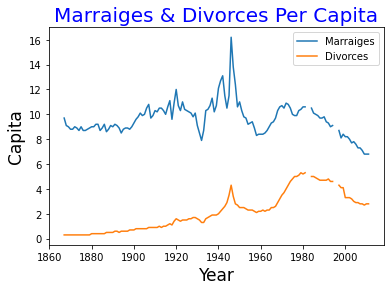

In [67]:
import pandas as panda
import matplotlib.pyplot as pplt
data = panda.read_csv(r'C:\Users\midun\us-marriages-divorces-1867-2014.csv')
data.plot(x = 'Year', y = ['Marriages_per_1000','Divorces_per_1000'],
label = ['Marraiges' , 'Divorces'])
pplt.title('Marraiges & Divorces Per Capita', color = 'Blue', fontsize = 20)
pplt.xlabel('Year', color = 'Black', fontsize = 17)
pplt.ylabel('Capita', color = 'Black', fontsize = 17)
pplt.show()

# Question 7

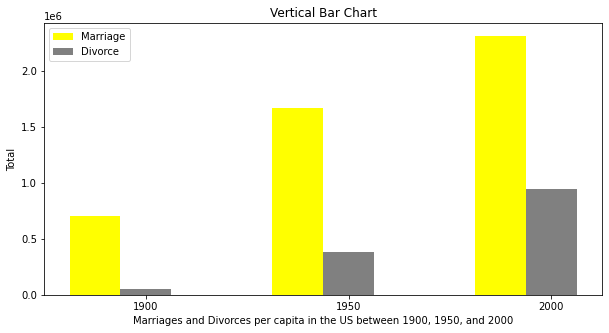

In [71]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=[10, 5])
# Data to be plotted
marriage = [709000, 1667000, 2315000]
divorce = [56000, 385000, 944000]

A = np.arange(len(marriage))
plt.bar(A, marriage, color = 'Yellow', width = 0.25)
plt.bar(A + 0.25, divorce, color = 'Grey', width = 0.25)
plt.legend(['Marriage', 'Divorce'])
plt.xticks([i + 0.25 for i in range(3)], ['1900', '1950', '2000'])
plt.title("Vertical Bar Chart")
plt.xlabel('Marriages and Divorces per capita in the US between 1900, 1950, and 2000')
plt.ylabel('Total')
plt.show()

# Question 8:

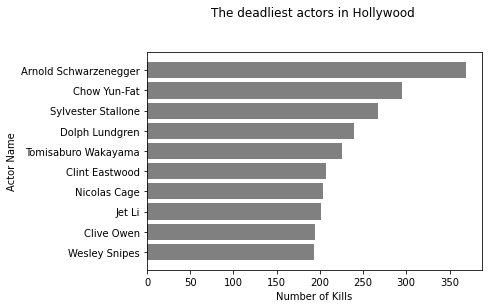

In [77]:
deadliest_actor_data= pd.read_csv('actor_kill_counts.csv')
deadliest_actor_data.head()
sortdeadliest_actor_data=deadliest_actor_data.sort_values(by='Count',ascending=True)
actor_Names= deadliest_actor_data.Actor
plt.barh(sortdeadliest_actor_data['Actor'],sortdeadliest_actor_data['Count'],color="Grey")
plt.xlabel("Number of Kills")
plt.ylabel("Actor Name")
plt.title("The deadliest actors in Hollywood \n\n ")
plt.show()

# Question 9:

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('roman-emperor-reigns.csv')

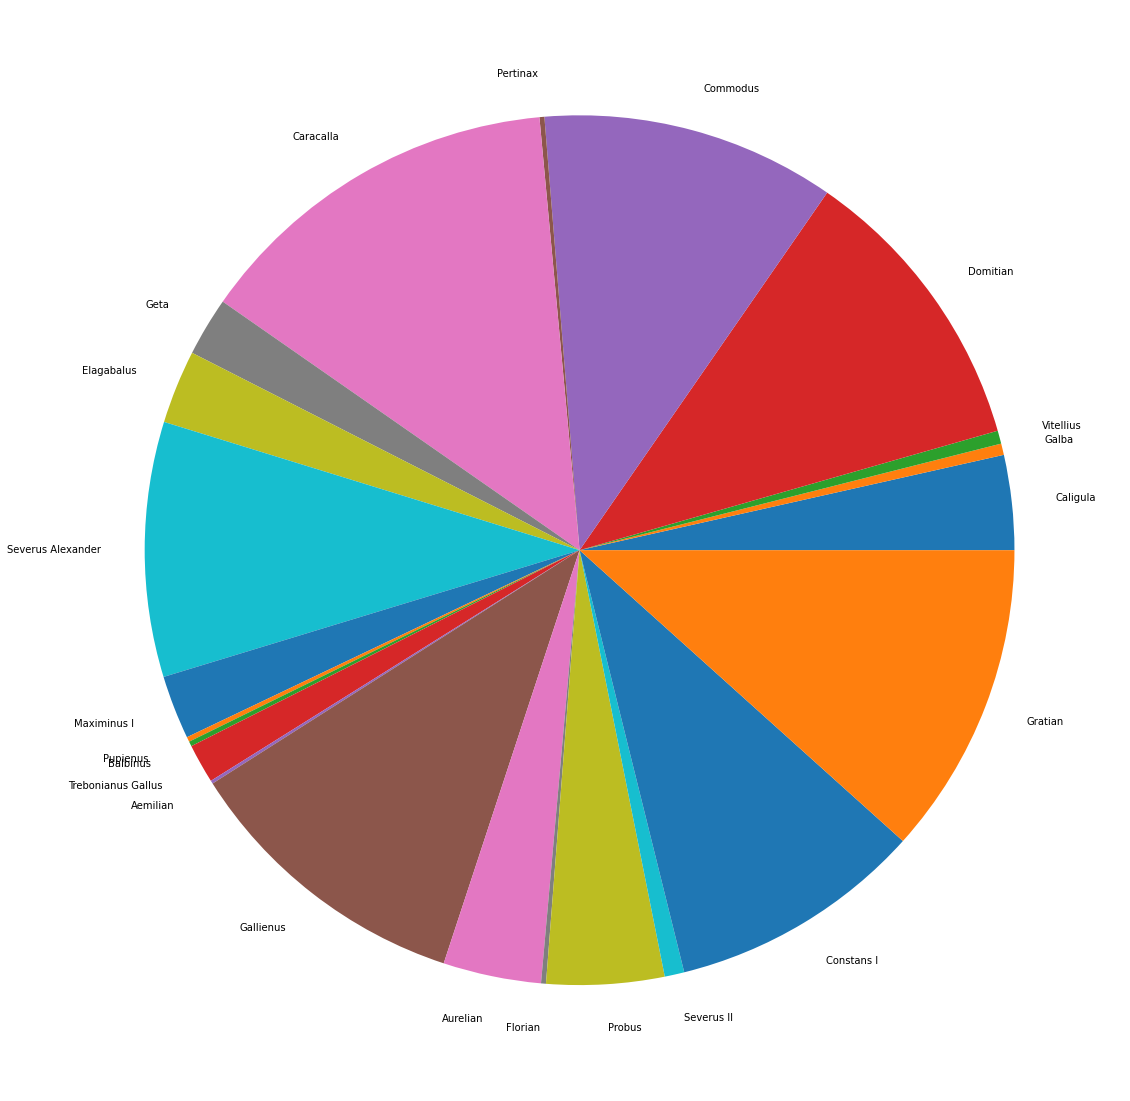

In [84]:
df=df.loc[df['Cause_of_Death']=='Assassinated',['Emperor','Length_of_Reign']]
plt.figure(figsize=(20,20))
plt.pie(df['Length_of_Reign'],labels=df['Emperor'])
plt.show()

# Question 10

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

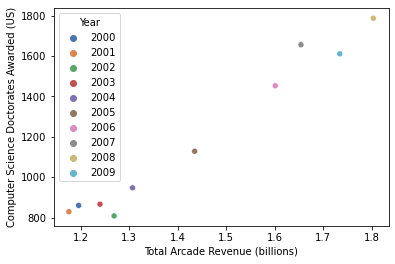

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
arcade_revenuew = pd.read_csv(r"C:\Users\midun\arcade-revenue-vs-cs-doctorates.csv")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', palette ='deep',data=arcade_revenuew)